In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
df_charge = pd.read_excel('Charge Data.xlsx')
df_charge.head()

,charge_id,visit_number,cpt_code,primary_insurance_type,contractual_adjustment,balance_ar,bad_debt_adjustments,bucket_name,last action status,last action code,...,most_recent_denial_code,most_recent_denial_date,most_recent_denial_group,patient_id,patient_payment_amount,allowed_amount,refund_amount,service_date,total_adjustment,total_payment_amount
0,739092_A9500__2022-01-27_2022-01-27,739092,A9500,MEDICARE,0.000000,-58.25,0.00,E. 121-150,CO 204- This service/equipment/drug is not cov...,NaN,...,NaN,1900-01-01,NaN,110188,58.250000,82.000000,-58.25,2022-01-27,0.00,140.25
1,739835_93000__2021-09-09_2022-05-24,739835,93000,MEDICARE,74.629997,3.07,-0.18,G. 180+,NaN,NaN,...,NaN,1900-01-01,NaN,14243,0.000000,15.370000,0.00,2021-09-09,74.45,12.48
2,739849_93000__2021-09-09_2022-05-24,739849,93000,MEDICARE,74.629997,3.07,-0.18,G. 180+,NaN,NaN,...,NaN,1900-01-01,NaN,62208,0.000000,15.370000,0.00,2021-09-09,74.45,12.48
3,747114_99214_25_2021-10-19_2022-01-10,747114,99214,CVCP,333.079987,0.00,0.00,G. 180+,CO 97- The benefit for this service is include...,Sent CVCP Inquiry 01/17/2022,...,NaN,1900-01-01,NaN,83060,33.330002,66.919998,0.00,2021-10-19,333.08,66.92
4,750783_99214__2021-11-29_2022-01-17,750783,99214,CVCP,319.690002,70.00,0.00,G. 180+,NaN,Imported Charges from External System -,...,NaN,1900-01-01,NaN,27082,0.000000,80.309998,70.00,2021-11-29,319.69,10.31


In [176]:
df_remit = pd.read_excel('Remit Data.xlsx')
df_remit.head()

,adjustedamt,contractual_adjustment,baddebtadjustments,allowed_amount,charge_amount,charge_id,cpt_code,visit_type,denial_code,denial_date,...,modality,modifier,patient_id,payment_id,paymentamt,paysource,checkdate,service_date,systemdate,visit_number
0,0.0,0.0,0.0,209.77,650.0,727836_93880__2021-07-12_2021-07-20,93880,Echocardiogram,22,2021-08-07,...,Other medical,NaN,47007.0,9220302,41.95,insurance,2022-04-26,2021-07-12,2022-04-26,727836
1,0.0,0.0,0.0,204.75,650.0,778383_93880__2022-04-11_2022-04-27,93880,Echocardiogram,NaN,1900-01-01,...,Other medical,NaN,105411.0,9309762,40.95,insurance,2022-05-27,2022-04-11,2022-05-30,778383
2,0.0,0.0,0.0,210.65,1300.0,778650_93306__2022-04-12_2022-04-27,93306,Echocardiogram,NaN,1900-01-01,...,Medical care,NaN,109211.0,9309760,42.13,insurance,2022-05-27,2022-04-12,2022-05-30,778650
3,0.0,0.0,0.0,94.41,285.0,785783_99213_25_2022-04-21_2022-04-26,99213,Office Visit - Established,NaN,1900-01-01,...,Medical care,25,30813.0,9309758,18.88,insurance,2022-05-27,2022-04-21,2022-05-30,785783
4,0.0,0.0,0.0,14.88,90.0,786654_93000__2022-04-25_2022-04-28,93000,EKG,NaN,1900-01-01,...,Diagnostic X-ray,NaN,30711.0,9309756,2.98,insurance,2022-05-27,2022-04-25,2022-05-30,786654


In [177]:
df_remit.columns

Index(['adjustedamt', 'contractual_adjustment', 'baddebtadjustments',
       'allowed_amount', 'charge_amount', 'charge_id', 'cpt_code',
       'visit_type', 'denial_code', 'denial_date', 'denial_group',
       'denial_notes', 'insurance_carrier_name', 'insurance_type',
       'location_type', 'modality', 'modifier', 'patient_id', 'payment_id',
       'paymentamt', 'paysource', 'checkdate', 'service_date', 'systemdate',
       'visit_number'],
      dtype='object')

In [178]:
df_charge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44976 entries, 0 to 44975
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   charge_id                       44976 non-null  object        
 1   visit_number                    44976 non-null  object        
 2   cpt_code                        44973 non-null  object        
 3   primary_insurance_type          44698 non-null  object        
 4   contractual_adjustment          44976 non-null  float64       
 5   balance_ar                      44976 non-null  float64       
 6   bad_debt_adjustments            44976 non-null  float64       
 7   bucket_name                     44976 non-null  object        
 8   last action status              6493 non-null   object        
 9   last action code                20939 non-null  object        
 10  charge_amount                   44976 non-null  int64         
 11  ch

In [179]:
df_charge.isnull().sum()

charge_id                             0
visit_number                          0
cpt_code                              3
primary_insurance_type              278
contractual_adjustment                0
balance_ar                            0
bad_debt_adjustments                  0
bucket_name                           0
last action status                38483
last action code                  24037
charge_amount                         0
charge_post_date                      0
modality                           6375
current_insurance_carrier_name        2
current_insurance_type             5882
visit_type                          753
insurance_payment_amount              0
most_recent_denial_code           43424
most_recent_denial_date               0
most_recent_denial_group          43444
patient_id                            0
patient_payment_amount                0
allowed_amount                        0
refund_amount                         0
service_date                          0


In [180]:
df_remit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150525 entries, 0 to 150524
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   adjustedamt             150525 non-null  float64       
 1   contractual_adjustment  150525 non-null  float64       
 2   baddebtadjustments      150525 non-null  float64       
 3   allowed_amount          142503 non-null  float64       
 4   charge_amount           142493 non-null  float64       
 5   charge_id               150137 non-null  object        
 6   cpt_code                142501 non-null  object        
 7   visit_type              139745 non-null  object        
 8   denial_code             2456 non-null    object        
 9   denial_date             150525 non-null  datetime64[ns]
 10  denial_group            2376 non-null    object        
 11  denial_notes            2376 non-null    object        
 12  insurance_carrier_name  125972

In [181]:
df_remit.isnull().sum()

adjustedamt                    0
contractual_adjustment         0
baddebtadjustments             0
allowed_amount              8022
charge_amount               8032
charge_id                    388
cpt_code                    8024
visit_type                 10780
denial_code               148069
denial_date                    0
denial_group              148149
denial_notes              148149
insurance_carrier_name     24553
insurance_type             30804
location_type                388
modality                   28909
modifier                  111118
patient_id                   388
payment_id                     0
paymentamt                     0
paysource                  66869
checkdate                      0
service_date                   0
systemdate                     0
visit_number                 388
dtype: int64

In [182]:
df_remit.shape

(150525, 25)

In [183]:
df_charge['patient_id'].nunique()

8831

In [184]:
df_remit['patient_id'].nunique()

10084

In [185]:
df_remit[df_remit['charge_id'].isnull()].head(10)

,adjustedamt,contractual_adjustment,baddebtadjustments,allowed_amount,charge_amount,charge_id,cpt_code,visit_type,denial_code,denial_date,...,modality,modifier,patient_id,payment_id,paymentamt,paysource,checkdate,service_date,systemdate,visit_number
145132,0.0,0.0,0.0,0.0,205.0,NaN,93295,NaN,109,2022-02-25,...,NaN,NaN,NaN,367678,0.0,insurance,2022-02-25,1900-01-01,2022-02-25,NaN
145133,0.0,0.0,0.0,0.0,125.0,NaN,93296,NaN,109,2022-02-25,...,NaN,NaN,NaN,367680,0.0,insurance,2022-02-25,1900-01-01,2022-02-25,NaN
145134,0.0,0.0,0.0,0.0,125.0,NaN,93294,NaN,119,2022-04-07,...,NaN,NaN,NaN,366939,0.0,insurance,2022-04-07,2022-03-16,2022-04-07,NaN
145135,0.0,0.0,0.0,0.0,2200.0,NaN,93229,NaN,119,2022-04-04,...,NaN,NaN,NaN,366958,0.0,insurance,2022-04-04,2022-03-21,2022-04-04,NaN
145136,0.0,0.0,0.0,0.0,30.0,NaN,G2012,NaN,119,2022-02-04,...,NaN,NaN,NaN,367919,0.0,insurance,2022-02-04,2022-01-11,2022-02-04,NaN
145137,0.0,0.0,0.0,0.0,125.0,NaN,93298,NaN,119,2022-02-16,...,NaN,NaN,NaN,368109,0.0,insurance,2022-02-16,2022-02-02,2022-02-16,NaN
145138,0.0,0.0,0.0,0.0,125.0,NaN,93296,NaN,119,2022-02-23,...,NaN,NaN,NaN,368229,0.0,insurance,2022-02-23,2022-01-17,2022-02-23,NaN
145139,0.0,0.0,0.0,0.0,125.0,NaN,93296,NaN,119,2022-01-26,...,NaN,NaN,NaN,368365,0.0,insurance,2022-01-26,2021-12-14,2022-01-26,NaN
145140,0.0,0.0,0.0,0.0,145.0,NaN,G2066,NaN,151,2022-04-26,...,NaN,NaN,NaN,366642,0.0,insurance,2022-04-26,2022-03-30,2022-04-26,NaN
145141,0.0,0.0,0.0,0.0,125.0,NaN,93294,NaN,151,2022-03-04,...,NaN,NaN,NaN,367217,0.0,insurance,2022-03-04,2022-01-23,2022-03-04,NaN


In [186]:
result = df_remit[(df_remit['charge_id'].isnull()) & (df_remit['paymentamt'] > 0)]

# display the first 5 rows of the result
print(result.head())

Empty DataFrame
Columns: [adjustedamt, contractual_adjustment, baddebtadjustments, allowed_amount, charge_amount, charge_id, cpt_code, visit_type, denial_code, denial_date, denial_group, denial_notes, insurance_carrier_name, insurance_type, location_type, modality, modifier, patient_id, payment_id, paymentamt, paysource, checkdate, service_date, systemdate, visit_number]
Index: []

[0 rows x 25 columns]


In [187]:
#Treating NULL values for remit data

In [188]:
df_remit.isnull().sum()

adjustedamt                    0
contractual_adjustment         0
baddebtadjustments             0
allowed_amount              8022
charge_amount               8032
charge_id                    388
cpt_code                    8024
visit_type                 10780
denial_code               148069
denial_date                    0
denial_group              148149
denial_notes              148149
insurance_carrier_name     24553
insurance_type             30804
location_type                388
modality                   28909
modifier                  111118
patient_id                   388
payment_id                     0
paymentamt                     0
paysource                  66869
checkdate                      0
service_date                   0
systemdate                     0
visit_number                 388
dtype: int64

In [189]:
#Check the charge id column, if it is linked with paymentamt column

In [190]:
df_remit[df_remit['charge_id'].isnull()].head(10)

,adjustedamt,contractual_adjustment,baddebtadjustments,allowed_amount,charge_amount,charge_id,cpt_code,visit_type,denial_code,denial_date,...,modality,modifier,patient_id,payment_id,paymentamt,paysource,checkdate,service_date,systemdate,visit_number
145132,0.0,0.0,0.0,0.0,205.0,NaN,93295,NaN,109,2022-02-25,...,NaN,NaN,NaN,367678,0.0,insurance,2022-02-25,1900-01-01,2022-02-25,NaN
145133,0.0,0.0,0.0,0.0,125.0,NaN,93296,NaN,109,2022-02-25,...,NaN,NaN,NaN,367680,0.0,insurance,2022-02-25,1900-01-01,2022-02-25,NaN
145134,0.0,0.0,0.0,0.0,125.0,NaN,93294,NaN,119,2022-04-07,...,NaN,NaN,NaN,366939,0.0,insurance,2022-04-07,2022-03-16,2022-04-07,NaN
145135,0.0,0.0,0.0,0.0,2200.0,NaN,93229,NaN,119,2022-04-04,...,NaN,NaN,NaN,366958,0.0,insurance,2022-04-04,2022-03-21,2022-04-04,NaN
145136,0.0,0.0,0.0,0.0,30.0,NaN,G2012,NaN,119,2022-02-04,...,NaN,NaN,NaN,367919,0.0,insurance,2022-02-04,2022-01-11,2022-02-04,NaN
145137,0.0,0.0,0.0,0.0,125.0,NaN,93298,NaN,119,2022-02-16,...,NaN,NaN,NaN,368109,0.0,insurance,2022-02-16,2022-02-02,2022-02-16,NaN
145138,0.0,0.0,0.0,0.0,125.0,NaN,93296,NaN,119,2022-02-23,...,NaN,NaN,NaN,368229,0.0,insurance,2022-02-23,2022-01-17,2022-02-23,NaN
145139,0.0,0.0,0.0,0.0,125.0,NaN,93296,NaN,119,2022-01-26,...,NaN,NaN,NaN,368365,0.0,insurance,2022-01-26,2021-12-14,2022-01-26,NaN
145140,0.0,0.0,0.0,0.0,145.0,NaN,G2066,NaN,151,2022-04-26,...,NaN,NaN,NaN,366642,0.0,insurance,2022-04-26,2022-03-30,2022-04-26,NaN
145141,0.0,0.0,0.0,0.0,125.0,NaN,93294,NaN,151,2022-03-04,...,NaN,NaN,NaN,367217,0.0,insurance,2022-03-04,2022-01-23,2022-03-04,NaN


In [191]:
#As we can see from the 1st 10 record that the payment amt is showing 0. then let us verify the rest of the charge_id null,
#if all paymentamt is 0 respectivly we can remove all the charge_id having null

In [192]:
result = df_remit[(df_remit['charge_id'].isnull()) & (df_remit['paymentamt'] > 0)]

# display the first 5 rows of the result
print(result.head())

Empty DataFrame
Columns: [adjustedamt, contractual_adjustment, baddebtadjustments, allowed_amount, charge_amount, charge_id, cpt_code, visit_type, denial_code, denial_date, denial_group, denial_notes, insurance_carrier_name, insurance_type, location_type, modality, modifier, patient_id, payment_id, paymentamt, paysource, checkdate, service_date, systemdate, visit_number]
Index: []

[0 rows x 25 columns]


In [193]:
df_remit.dropna(subset=['charge_id'],inplace=True)

In [194]:
df_charge['charge_id'].nunique()

44946

In [195]:
df_remit['charge_id'].nunique()

58483

In [196]:
df_remit[df_remit['patient_id'].isnull()].head()

,adjustedamt,contractual_adjustment,baddebtadjustments,allowed_amount,charge_amount,charge_id,cpt_code,visit_type,denial_code,denial_date,...,modality,modifier,patient_id,payment_id,paymentamt,paysource,checkdate,service_date,systemdate,visit_number


In [197]:
df_remit['patient_id'].isnull().sum()

0

In [198]:
df_remit.isnull().sum()

adjustedamt                    0
contractual_adjustment         0
baddebtadjustments             0
allowed_amount              8022
charge_amount               8022
charge_id                      0
cpt_code                    8024
visit_type                 10392
denial_code               148069
denial_date                    0
denial_group              148103
denial_notes              148103
insurance_carrier_name     24553
insurance_type             30732
location_type                  0
modality                   28521
modifier                  110730
patient_id                     0
payment_id                     0
paymentamt                     0
paysource                  66869
checkdate                      0
service_date                   0
systemdate                     0
visit_number                   0
dtype: int64

In [199]:
df_remit['charge_amount'].sum()

98650204.0

In [200]:
df_remit['charge_id'].value_counts().sum()

150137

In [201]:
df_charge['charge_post_date'].isnull().sum()

0

In [202]:
df_remit['denial_code'].value_counts().sum()



2068

In [203]:
num_claims = df_remit.groupby(['patient_id', 'service_date'])['charge_id'].nunique().count()
print(f"Total number of claims: {num_claims}")


Total number of claims: 30781


In [204]:
num_claims = df_remit['charge_id'].nunique()
print(f"Total number of claims: {num_claims}")


Total number of claims: 58483


In [205]:
df_remit['charge_id'].value_counts().sum()

150137

In [206]:
df_charge['most_recent_denial_code'].value_counts().sum()

1552

In [207]:
df_remit['denial_group'].value_counts().sort_values(ascending=False)


denial_group
Info Needed from Provider              365
Not a Covered Service                  322
Eligibility-Other Insurance Primary    276
Coding-Medical Necessity               257
Authorization Issue                    126
Eligibility-Terminated Coverage        118
Duplicate                              116
Part of a Main Procedure               111
Timely Appeal                           97
Refund Request/Cash Review              70
Timely Filing                           41
Info Only                               31
Eligibility-Unable to ID Patient        20
Credentialing Ops                       15
Appeal Related                          13
Coding-General                          12
Coding-Dx                               11
Credentialing Admin                     11
Trials/Experimental                      8
Claim Form Issue                         7
Eligibility                              2
Info Needed from Patient                 2
Coding-Modifier                          

In [208]:
import pandas as pd


# Calculate the denial counts for each group and code
denial_counts = df_remit.groupby(['denial_group', 'denial_code']).size().reset_index(name='denial_count')


# Filter the data to keep only the top 5 denial_groups
top_denial_groups = ['Info Needed from Provider', 'Not a Covered Service', 'Eligibility-Other Insurance Primary', 'Coding-Medical Necessity', 'Authorization Issue']
df_top_denials = df_remit[df_remit['denial_group'].isin(top_denial_groups)]

# Initialize an empty dataframe to store the output
output = pd.DataFrame(columns=['denial_group', 'denial_codes', 'denial_notes'])

# Loop through the top denial groups and extract the denial codes and notes
for group in top_denial_groups:
    codes = df_top_denials[df_top_denials['denial_group'] == group]['denial_code'].unique().tolist()
    notes = df_top_denials[df_top_denials['denial_group'] == group]['denial_notes'].dropna().unique().tolist()
    
    # Add the data to the output dataframe
    output.loc[len(output)] = {'denial_group': group, 'denial_codes': codes, 'denial_notes': notes}

# Display the output
print(output)



                          denial_group              denial_codes   
0            Info Needed from Provider       [16, 252, 129, 250]  \
1                Not a Covered Service  [204, 272, 96, 222, 273]   
2  Eligibility-Other Insurance Primary   [22, 109, 276, B9, B11]   
3             Coding-Medical Necessity       [151, 50, B16, 150]   
4                  Authorization Issue                [197, 243]   

                                        denial_notes  
0  [Claim/service lacks information or has submis...  
1  [This service/equipment/drug is not covered un...  
2  [This care may be covered by another payer per...  
3  [Payment adjusted because the payer deems the ...  
4  [Precertification/authorization/notification/p...  


In [209]:
df_remit['denial_notes'].value_counts()

denial_notes
Claim/service lacks information or has submission/billing error(s). Usage: Do not use this code for claims attachment(s)/other documentation. At least one Remark Code must be provided (may be comprised of either the NCPDP Reject Reason Code, or Remittance Advice Remark Code that is not an ALERT.) Refer to the 835 Healthcare Policy Identification Segment (loop 2110 Service Payment Information REF), if present.    306
This service/equipment/drug is not covered under the patient‚Äôs current benefit plan                                                                                                                                                                                                                                                                                                                                           240
These are non-covered services because this is not deemed a 'medical necessity' by the payer. Usage: Refer to the 835 Healthcare Policy Identificat

According to the top denial notes present here, here are the finding that should be implemented to reduce denials:

1. Improve training: Ensure that staff members who are responsible for submitting claims are well-trained and up-to-date with the latest coding and billing guidelines.

2. Conduct regular audits: Regularly audit claims submissions and billing practices to identify any errors or potential issues that could result in a denial.

3. Streamline processes: Look for ways to streamline the claims submission process, such as using software or automation tools to reduce errors and make the process more efficient.

4. Develop clear policies: Develop and enforce clear policies and procedures around claims submission and billing, including guidelines for documentation and billing codes.

5. Improve communication: Ensure that staff members are communicating effectively with payers and patients, including following up on outstanding claims and addressing any issues or concerns in a timely manner.

6. Stay up-to-date: Stay up-to-date with changes to healthcare regulations and policies, including changes to reimbursement rates and billing guidelines.

7. Engage in continuous quality improvement: Regularly review and assess claims submission and denial data to identify areas for improvement and implement strategies to prevent denials in the future.

Implementing these recommendations can help reduce denials and improve the efficiency of the claims submission and reimbursement process.

To ensure the recovery of outstanding claims, Revfix can undertake the following steps and action plan:

1. Identify all outstanding claims: Revfix should first identify all the outstanding claims that are pending for payment from the payers. This can be done by reviewing the billing and accounts receivable reports.

2. Prioritize the outstanding claims: Once all the outstanding claims are identified, Revfix should prioritize them based on their age and the amount of money owed. This will help in focusing on the most critical claims first.

3. Contact payers: Revfix should contact the payers and follow up on the outstanding claims. They should inquire about the reasons for delayed payments, and ask for any additional information or documentation required to process the claims.

4. Submit additional information/documentation: If the payer requests additional information or documentation, Revfix should provide it promptly to avoid further delays.

5. Appeal denied claims: If any claims were denied, Revfix should review the reasons for the denials and submit appeals if appropriate. They should also ensure that all future claims are submitted with complete and accurate information to avoid denials.

6. Monitor progress: Revfix should monitor the progress of the outstanding claims regularly and follow up with the payers until the claims are resolved.

7. Implement effective billing processes: To prevent future outstanding claims, Revfix should implement effective billing processes, including verifying patient insurance information before providing services, submitting claims promptly, and following up on unpaid claims in a timely manner.

By implementing these steps and action plan, Revfix can ensure the recovery of outstanding claims and prevent future delays in payment.

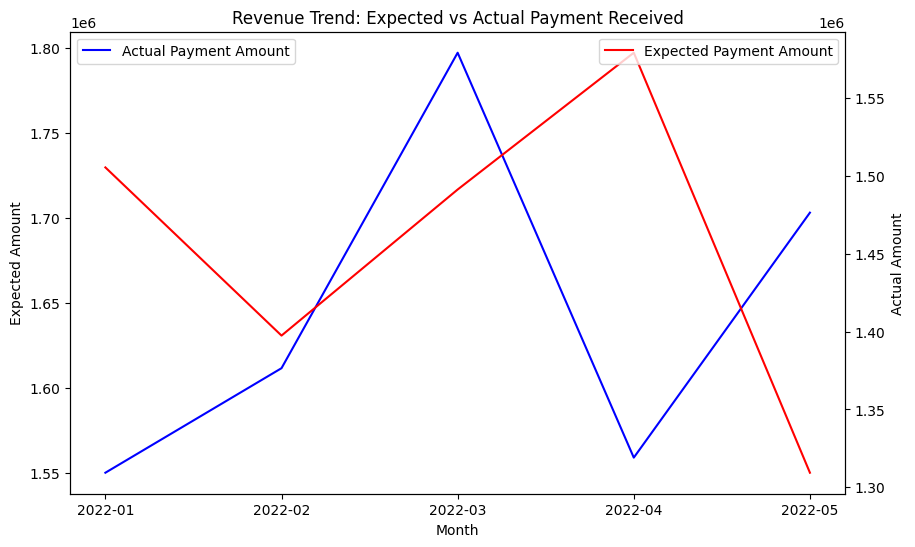

In [210]:


# Group remit by month
df_remit_month = df_remit.groupby(df_remit['systemdate'].dt.strftime('%Y-%m'))['paymentamt'].sum().reset_index()

# Group charge by month
df_charge_month = df_charge.groupby(df_charge['charge_post_date'].dt.strftime('%Y-%m'))['total_payment_amount'].sum().reset_index()

# Set figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot paymentamt from remit on first y-axis
ax1.plot(df_remit_month['systemdate'], df_remit_month['paymentamt'], color='blue')
ax1.set_xlabel('Month')
ax1.set_ylabel('Expected Amount')

# Create second y-axis
ax2 = ax1.twinx()

# Plot total_payment_amount from charge on second y-axis
ax2.plot(df_charge_month['charge_post_date'], df_charge_month['total_payment_amount'], color='red')
ax2.set_ylabel('Actual Amount')

# Set title
plt.title('Revenue Trend: Expected vs Actual Payment Received')

# Move the legend to the right side of the plot
ax1.legend(['Actual Payment Amount'], loc='upper left')
ax2.legend(['Expected Payment Amount'], loc='upper right')

# Show plot
plt.show()



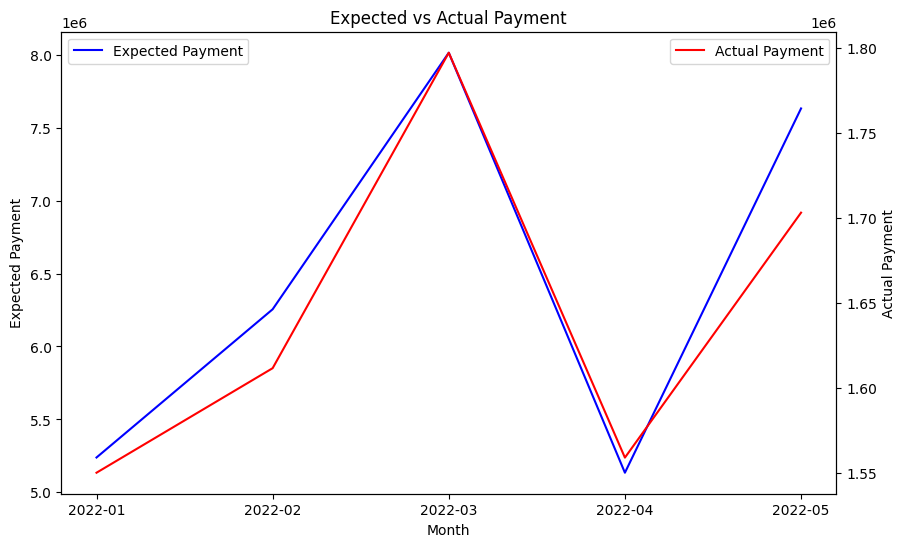

In [238]:
import matplotlib.pyplot as plt

# Group by month and calculate expected payment
df_remit_month = df_remit.groupby(df_remit['systemdate'].dt.strftime('%Y-%m'))['allowed_amount'].sum().reset_index()

# Group by month and calculate actual payment
df_remit_payment_month = df_remit.groupby(df_remit['systemdate'].dt.strftime('%Y-%m'))['paymentamt'].sum().reset_index()

# Set figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot expected payment on first y-axis
ax1.plot(df_remit_month['systemdate'], df_remit_month['allowed_amount'], color='blue')
ax1.set_xlabel('Month')
ax1.set_ylabel('Expected Payment')

# Create second y-axis
ax2 = ax1.twinx()

# Plot actual payment on second y-axis
ax2.plot(df_remit_payment_month['systemdate'], df_remit_payment_month['paymentamt'], color='red')
ax2.set_ylabel('Actual Payment')

# Set title
plt.title('Expected vs Actual Payment')

# Move the legend to the right side of the plot
ax1.legend(['Expected Payment'], loc='upper left')
ax2.legend(['Actual Payment'], loc='upper right')

# Show plot
plt.show()


In [239]:
# Filter the DataFrame to only include rows where denial_code is not null
df_denied = df_remit[df_remit['denial_code'].notnull()]

# Calculate the sum of allowed_amount for the filtered DataFrame
sum_allowed_amount = df_denied['allowed_amount'].sum()

# Calculate the sum of paymentamt for the filtered DataFrame
sum_paymentamt = df_denied['paymentamt'].sum()

# Subtract the sum of paymentamt from the sum of allowed_amount to get the remaining payment collection due to denied codes
remaining_payment_due_to_denials = sum_allowed_amount - sum_paymentamt

# Divide the remaining payment collection due to denied codes by the sum of allowed_amount to get the percentage of payment collection remaining due to denied codes
percent_payment_due_to_denials = remaining_payment_due_to_denials / sum_allowed_amount * 100

print(f"Remaining payment collection due to denied codes: ${remaining_payment_due_to_denials:,.2f}")
print(f"Percentage of payment collection remaining due to denied codes: {percent_payment_due_to_denials:.2f}%")


Remaining payment collection due to denied codes: $167.82
Percentage of payment collection remaining due to denied codes: 80.00%


# Percentage of payment to be recovered

In [213]:
print(round(((df_charge['total_amount'].sum() -df_remit['paymentamt'].sum())/df_charge['total_amount'].sum())*100,2),"%")

-22.47 %


In [216]:

df_remit_insurance = df_remit[df_remit['paysource'] == 'insurance']


df_remit_insurance['paymentamt'].sum()




6897674.6000000015

In [215]:
df_charge['total_amount'].sum()

6712643.219653636

In [212]:
df_charge['total_amount'] = df_charge['total_payment_amount'] - df_charge['refund_amount']

In [173]:
df_charge.groupby(df_charge['charge_post_date'].dt.strftime('%Y-%m'))['total_payment_amount'].sum().reset_index()

,charge_post_date,total_payment_amount
0,2022-01,1.845401e+06
1,2022-02,1.784864e+06
2,2022-03,2.177791e+06
3,2022-04,2.232796e+06
4,2022-05,2.419401e+06


In [ ]:
# Top 3 denial codes by month for df_remit
df_remit_denial_month = df_remit.groupby([df_remit['systemdate'].dt.year, df_remit['systemdate'].dt.month, df_remit['denial_code']])['paymentamt'].sum().reset_index()
df_remit_denial_month = df_remit_denial_month.sort_values(['systemdate', 'paymentamt'], ascending=[True, False])
df_remit_denial_month = df_remit_denial_month.groupby(['systemdate']).head(3)
print(df_remit_denial_month)

# Finding in Denial Sections 

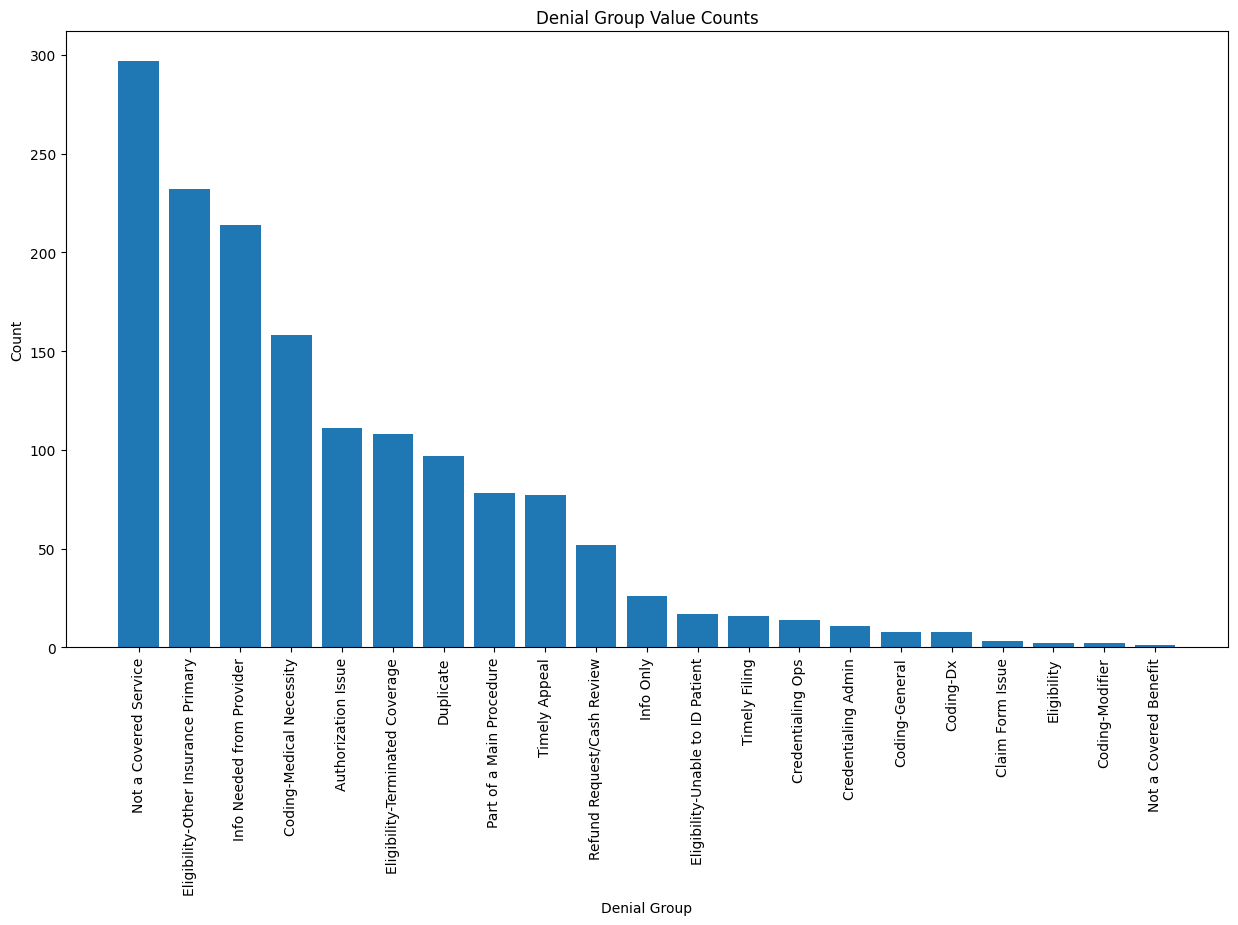

In [217]:
denial_counts = df_charge['most_recent_denial_group'].value_counts()

# Plot bar chart
plt.figure(figsize = (15,8))
plt.bar(denial_counts.index, denial_counts.values)

# Set plot title and axis labels

plt.title('Denial Group Value Counts')
plt.xlabel('Denial Group')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Show the plot
plt.show()



#### Not a Covered Service _ denied group findings

In [218]:
# filter the rows where the most_recent_denial_group is "Not a covered service"
not_covered_service = df_charge[df_charge['most_recent_denial_group'] == 'Not a Covered Service']

# You can then use the sum() function to get the sum of the values in the insurance_payment_amount column
sum_insurance_payment_amount = not_covered_service['insurance_payment_amount'].sum()

# The variable sum_insurance_payment_amount will contain the sum of the values
sum_insurance_payment_amount

25216.449822664224

In [219]:

# You can then use the sum() function to get the sum of the values in the insurance_payment_amount column
sum_total_payment_amount = df_charge[df_charge['most_recent_denial_group'] == 'Not a Covered Service']['total_payment_amount'].sum()

# The variable sum_insurance_payment_amount will contain the sum of the values
sum_total_payment_amount

38931.810000000005

From this. we can conclude that the amount that is charged under Insurance is not the right way, as it is a Not a Covered Service, the charge must be goes into Patient Bill.

So the Total Amount 38931.81 is pending from Patient side.


In [220]:
# filter the rows where the most_recent_denial_group is "Not a covered service"
ncs = df_remit[df_remit['denial_group'] == 'Not a Covered Service']

# You can then use the sum() function to get the sum of the values in the insurance_payment_amount column
sum_amount_paid = ncs['paymentamt'].sum()

# The variable sum_insurance_payment_amount will contain the sum of the values
sum_amount_paid

0.0

Conclusion for "Not a Covered Service" Denial Group:

1. Total of 38K $ is charged but none of the payment is proceeded because more than half are claimed under Insurance.

2.  We need to Look for ways to streamline the claims submission process, such as using software or automation tools to reduce errors and make the process more efficient such that Not a Covered Service should be considered a priority

# Total Amount Associated with Denied Claims

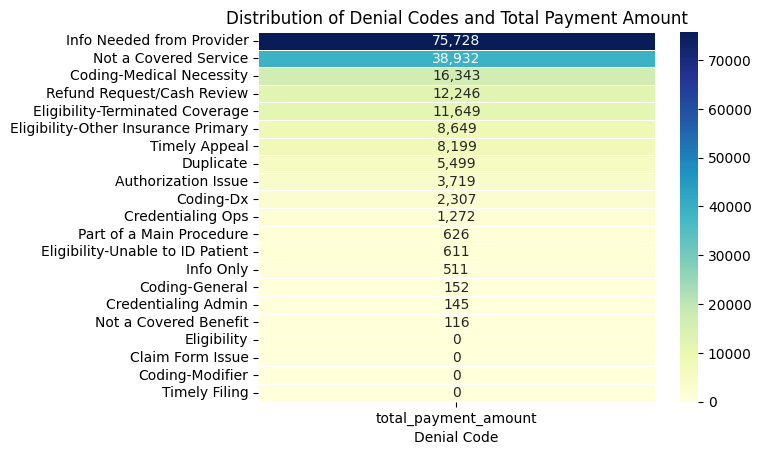

In [221]:
# create a pivot table to get the total_payment_amount for each denial code
pivot = df_charge.pivot_table(index='most_recent_denial_group', values='total_payment_amount', aggfunc='sum').sort_values(by='total_payment_amount',ascending=False)

# create a heatmap of the pivot table
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt=',.0f', linewidths=.5)

# set the title and axis labels
plt.title('Distribution of Denial Codes and Total Payment Amount')
plt.xlabel('Denial Code')
plt.ylabel('')

# show the plot
plt.show()

In [222]:
# Gross Collection chart

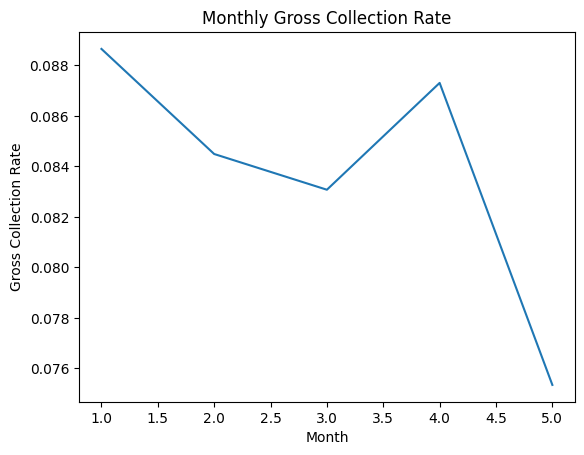

In [223]:

# calculate month from systemdate column in df_remit
df_remit['month'] = pd.to_datetime(df_remit['systemdate']).dt.month

# group remit data by month and sum paymentamt
df_remit_payments = df_remit.groupby('month')['paymentamt'].sum().reset_index()

# group charge data by month and sum charge_amount
df_charge_charges = df_remit.groupby('month')['charge_amount'].sum().reset_index()

# merge remit and charge data on month
df_merged = pd.merge(df_remit_payments, df_charge_charges, on='month')

# calculate gross collection rate
df_merged['Gross Collection Rate'] = df_merged['paymentamt'] / df_merged['charge_amount']

# plot the gross collection rate
plt.plot(df_merged['month'], df_merged['Gross Collection Rate'])
plt.xlabel('Month')
plt.ylabel('Gross Collection Rate')
plt.title('Monthly Gross Collection Rate')
plt.show()


# Net Collection Rate

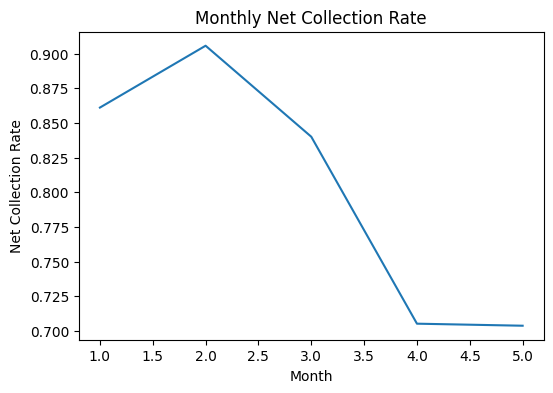

In [228]:
df_charge['month'] = pd.to_datetime(df_charge['charge_post_date']).dt.month
# calculate net collection rate
df_remit_payments = df_remit.groupby('month')['paymentamt'].sum().reset_index()
df_charge_charges = df_charge.groupby('month')['charge_amount'].sum().reset_index()
df_charge_adjustments = df_charge.groupby('month')[['contractual_adjustment', 'bad_debt_adjustments']].sum().reset_index()

df_merged = pd.merge(df_remit_payments, df_charge_charges, on='month')
df_merged = pd.merge(df_merged, df_charge_adjustments, on='month')
df_merged['net_collection_rate'] = df_merged['paymentamt'] / (df_merged['charge_amount'] - df_merged['contractual_adjustment'] - df_merged['bad_debt_adjustments'])

# plot net collection rate
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(df_merged['month'], df_merged['net_collection_rate'])
ax.set_xlabel('Month')
ax.set_ylabel('Net Collection Rate')
plt.title('Monthly Net Collection Rate')
plt.show()


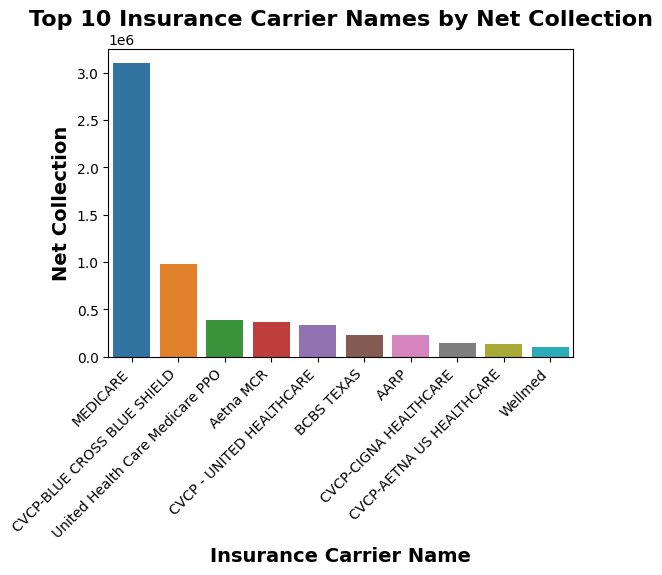

In [229]:

# calculate net collection for each insurance carrier name
df_net_collection = df_remit.groupby('insurance_carrier_name')['paymentamt'].sum().reset_index()
df_net_collection = df_net_collection.sort_values('paymentamt', ascending=False)

# plot the top 10 insurance carrier names by net collection
top_10_carriers = df_net_collection.head(10)
plt.figure(figsize=(6, 4))
sns.barplot(x='insurance_carrier_name', y='paymentamt', data=top_10_carriers)
plt.xlabel('Insurance Carrier Name', fontsize=14, fontweight='bold')
plt.ylabel('Net Collection', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Insurance Carrier Names by Net Collection', fontsize=16, fontweight='bold')
plt.show()



# Bad debt write Off

In [230]:
bad_debt_writeoff_percent = round((df_charge['bad_debt_adjustments'].sum() / df_charge['total_payment_amount'].sum()) * 100,2)
print(bad_debt_writeoff_percent,"%")

1.51 %


# Contractual Adjustment Percentage

In [231]:
Contractual_Adjustment_Percentage = round((df_charge['contractual_adjustment'].sum() / df_charge['charge_amount'].sum()) * 100,2)
print(Contractual_Adjustment_Percentage,"%")

63.48 %


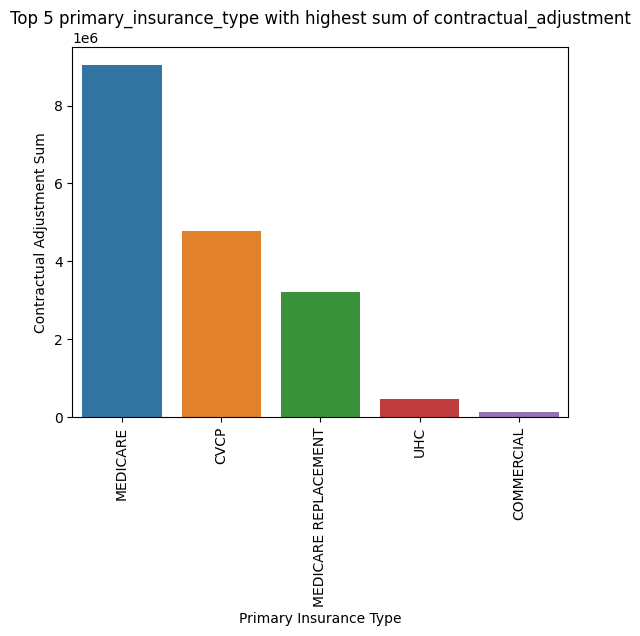

In [232]:


# group the charge data by primary_insurance_type and sum the contractual_adjustment column
df_contractual = df_charge.groupby('primary_insurance_type')['contractual_adjustment'].sum().reset_index()

# sort by the contractual_adjustment column in descending order and take the top 5 companies
df_top5_contractual = df_contractual.sort_values('contractual_adjustment', ascending=False).head(5)

# plot a bar chart of the top 5 companies
sns.barplot(data=df_top5_contractual, x='primary_insurance_type', y='contractual_adjustment')
plt.title('Top 5 primary_insurance_type with highest sum of contractual_adjustment')
plt.xlabel('Primary Insurance Type')
plt.xticks(rotation=90)
plt.ylabel('Contractual Adjustment Sum')
plt.show()



### Insurance Companies producing bad debt

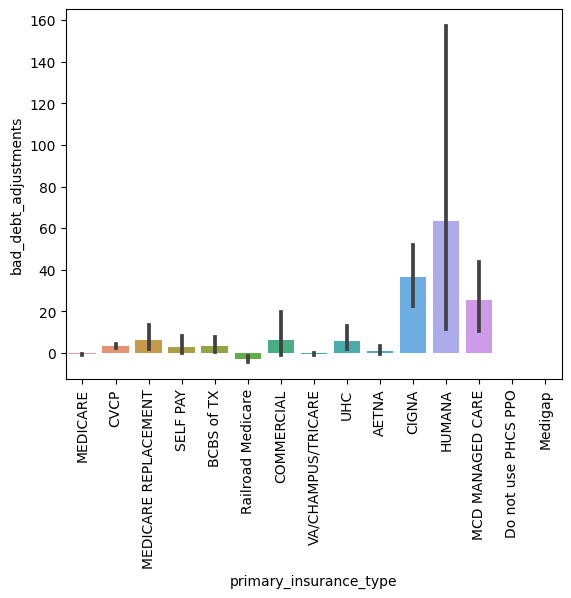

In [233]:
sns_plot = sns.barplot(data=df_charge, x='primary_insurance_type',y='bad_debt_adjustments')

sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation=90)
plt.show()

SO, HUMANA, CIGNA and MCD MANAGED CARE are the primary insurance who produces bad debt. We need to look more closely into these firms

# Outstanding Balance Analysis

In [234]:
balance_ar_percentage = round(df_charge['balance_ar'].sum() / df_charge['total_payment_amount'].sum() * 100,2)
print(balance_ar_percentage,"%")

42.19 %


In [235]:
#Removing Alphabets and dot operator in bucket name to simplify.
df_charge['bucket_name'] = df_charge['bucket_name'].str.replace('[A-Za-z.+\s]+', '', regex=True)


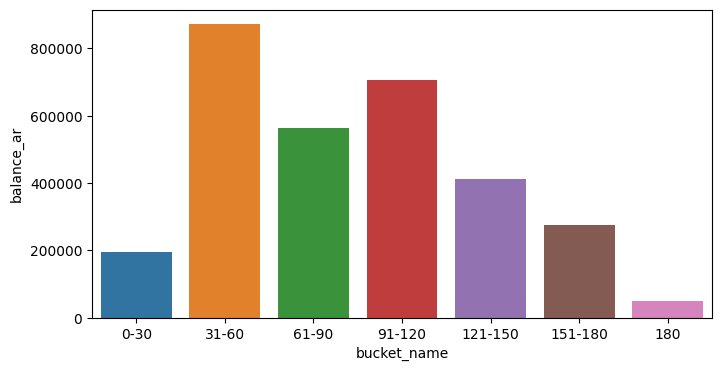

In [237]:
# Define the mapping dictionary
bucket_map = {"0-30": 1,
              "31-60": 2,
              "61-90": 3,
              "91-120": 4,
              "121-150": 5,
              "151-180": 6,
              "180": 7}
df_grouped = df_charge.groupby('bucket_name')['balance_ar'].sum().reset_index()

# Apply the mapping to the 'bucket_name' column and create a new column 'bucket_order'
df_grouped['bucket_order'] = df_grouped['bucket_name'].map(bucket_map)

# Sort the dataframe by 'bucket_order'
df_grouped.sort_values('bucket_order', inplace=True)

# Plot the data
plt.figure(figsize=(8,4))
sns.barplot(data=df_grouped, x='bucket_name', y='balance_ar')

plt.show()

# Outstanding AR over time

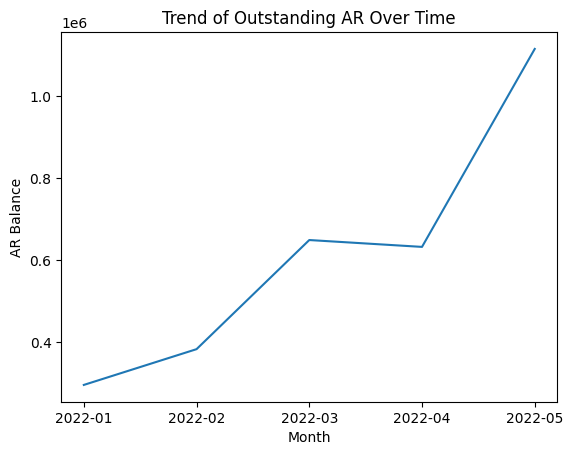

In [144]:
# group the AR balance by month
df_ar_by_month = df_charge.groupby(df_charge['charge_post_date'].dt.to_period('M'))['balance_ar'].sum()

# convert index to strings using strftime
x_values = [str(month) for month in df_ar_by_month.index]

# create the line chart
plt.plot(x_values, df_ar_by_month.values)

# set chart title and axis labels
plt.title('Trend of Outstanding AR Over Time')
plt.xlabel('Month')
plt.ylabel('AR Balance')


# display the chart
plt.show()


## No of Lagged Days to take for final settlement of payment from insurance

<Axes: ylabel='Frequency'>

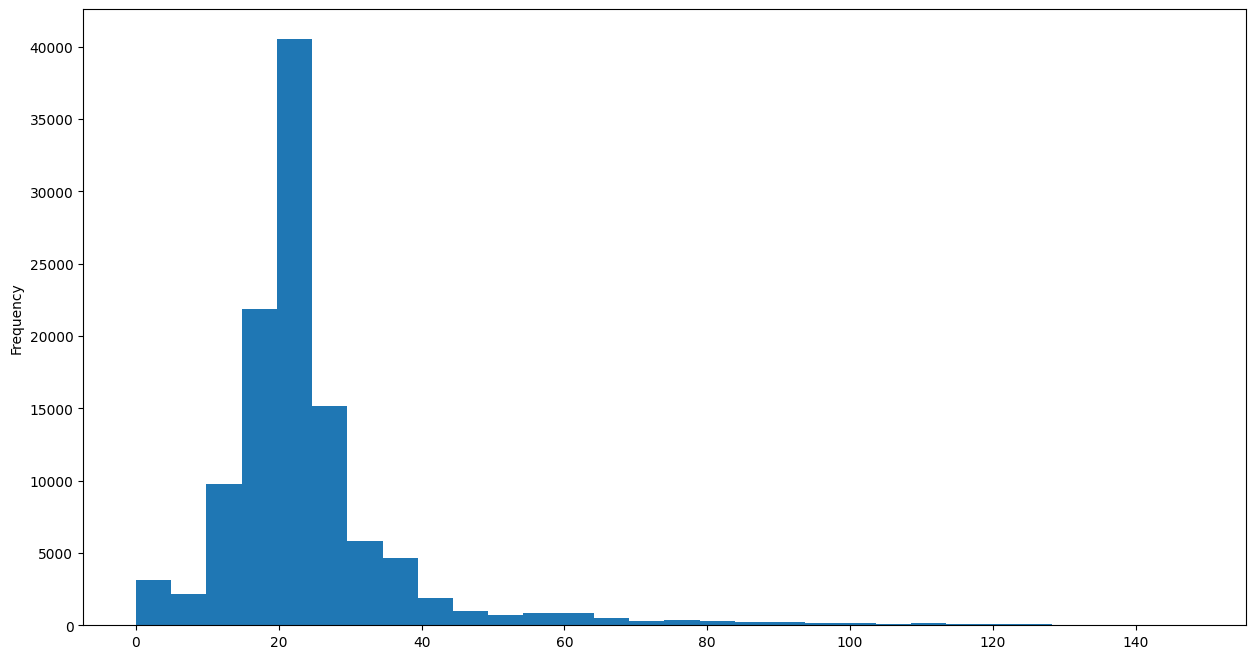

In [135]:

# convert date columns to datetime format
df_charge['charge_post_date'] = pd.to_datetime(df_charge['charge_post_date'])
df_remit['systemdate'] = pd.to_datetime(df_remit['systemdate'])

# merge the two dataframes based on their common column
df_merged = pd.merge(df_charge, df_remit, on='charge_id')

# calculate the payment lag time in days
df_merged['payment_lag_time'] = (df_merged['systemdate'] - df_merged['charge_post_date']).dt.days
df_merged = df_merged[df_merged['payment_lag_time'] >= 0]
# create a histogram of payment lag time
plt.figure(figsize = (15,8))
df_merged['payment_lag_time'].plot(kind='hist', bins=30)


From here, we can conclude that most of the payment are settled with in 20-25 days 